In [1]:
include("../mps.jl")
using .MatrixProductState
using LinearAlgebra

using Plots

In [9]:
r_c = 14
r_r = 16

psi_complex = rand(ComplexF32, (2 for _=1:r_c)...)
psi_complex /= sqrt(abs(dot(psi_complex, psi_complex)))

psi_real = rand(Float64, (2 for _=1:r_r)...)
psi_real /= norm(psi_real);

In [10]:
# TODO: update with contraction method
function mps_and_contract(psi, bond_dim)
    A_mps = contract_mps(mps(psi, bond_dim))
    return abs(dot(A_mps, psi))
end

mps_and_contract (generic function with 1 method)

Float32[0.8688101, 0.8704279, 0.87250155, 0.8757089, 0.8790844, 0.883199, 0.8927684, 0.9333612, 0.9867235, 0.9999985, 0.9999985, 0.9999985, 0.9999985]

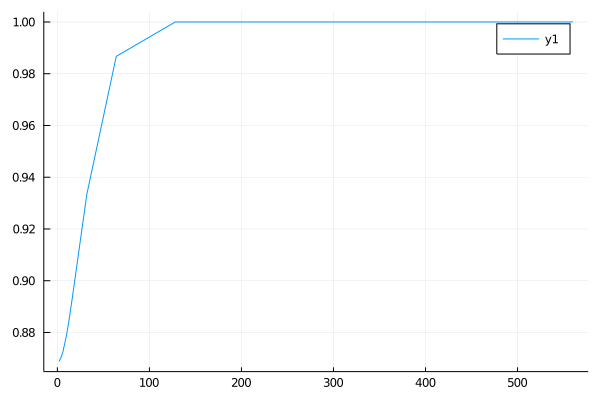

In [11]:
bond_dims = [2, 4, 6, 8, 10, 12, 16, 32, 64, 128, 256, 512, 560]
complex_fidelities = map(chi->mps_and_contract(psi_complex, chi),
                         bond_dims)
print(complex_fidelities)
plot(bond_dims, complex_fidelities) # ? 

[0.8660742111681875, 0.8665395850307188, 0.8672154375067894, 0.8680370639776079, 0.8689392175596197, 0.8703531923392174, 0.8736616936116995, 0.8915587676197295, 0.9321721956408225, 0.9863815865849302, 0.9999999999999976, 0.9999999999999976, 0.9999999999999976]

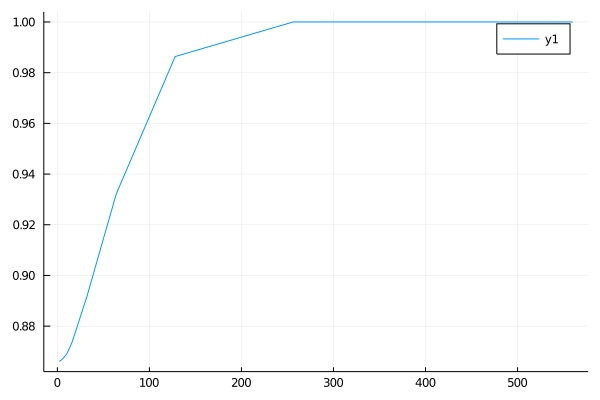

In [12]:
real_fidelities = map(chi->mps_and_contract(psi_real, chi),
                      bond_dims)
print(real_fidelities)
plot(bond_dims, real_fidelities)